In [1]:
import tensorflow as tf
import tensorflow 
from tensorflow import keras

In [2]:
import numpy as np

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [5]:
import matplotlib.pyplot as plt

In [6]:
import random

# Load Dataset

In [7]:
X_train = np.loadtxt('input.csv', delimiter = ",")
Y_train = np.loadtxt('labels.csv', delimiter = ",")

X_test = np.loadtxt('input_test.csv', delimiter = ",")
Y_test = np.loadtxt('labels_test.csv', delimiter = ",")

In [8]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of X_test:  (400, 30000)


In [9]:
# after reshapping 

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [10]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of X_test:  (400, 1)


In [11]:
X_train[1,:] # values range from 0 to 255

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [12]:
# Rescale this values between 0-1

X_train = X_train/255.0
Y_train = Y_train/255.0

X_test = X_test/255.0
Y_test = Y_test/255.0

In [13]:
X_train[1,:] # values range from 0 to 255 #normalized value

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

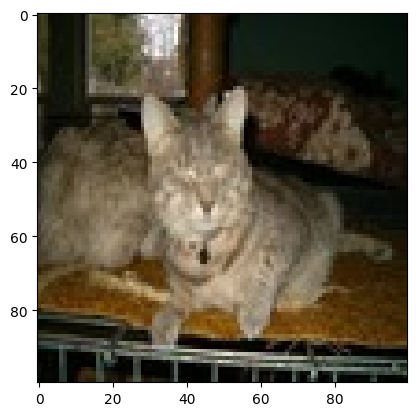

In [14]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

**Define the Model by creating a function**

In [15]:
# model = Sequential([
#     Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
#     MaxPooling2D((2,2)),
    
#     Conv2D(32, (3,3), activation = 'relu'),
#     MaxPooling2D((2,2)),
    
#     Flatten(),
#     Dense(64, activation = 'relu'),
#     Dense(1, activation = 'sigmoid')
# ])

**Another way to define the model**

In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
model.fit(X_train,Y_train, epochs = 15, batch_size = 64)

Epoch 1/15
32/32 [==============================] - 7s 200ms/step - loss: 0.0455 - accuracy: 0.4870
Epoch 2/15
32/32 [==============================] - 7s 206ms/step - loss: 0.0149 - accuracy: 0.5000
Epoch 3/15
32/32 [==============================] - 7s 206ms/step - loss: 0.0145 - accuracy: 0.5000
Epoch 4/15
32/32 [==============================] - 7s 206ms/step - loss: 0.0142 - accuracy: 0.5000
Epoch 5/15
32/32 [==============================] - 7s 209ms/step - loss: 0.0141 - accuracy: 0.5000
Epoch 6/15
32/32 [==============================] - 7s 210ms/step - loss: 0.0142 - accuracy: 0.5000
Epoch 7/15
32/32 [==============================] - 7s 207ms/step - loss: 0.0140 - accuracy: 0.5000
Epoch 8/15
32/32 [==============================] - 7s 209ms/step - loss: 0.0140 - accuracy: 0.5000
Epoch 9/15
32/32 [==============================] - 7s 210ms/step - loss: 0.0139 - accuracy: 0.5000
Epoch 10/15
32/32 [==============================] - 7s 207ms/step - loss: 0.0139 - accuracy: 0.5000

In [19]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 24ms/step - loss: 0.0142 - accuracy: 0.5000


[0.0142422029748559, 0.5]

# Making Prediction

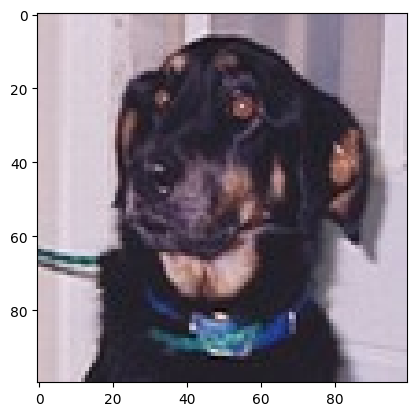

1/1 [==============================] - 0s 20ms/step
Our model says it is a : Dog


In [21]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
    pred = "Dog"
else:
    pred = "Cat"
print("Our model says, it is a : " + pred)